# Wordle

This is a fun project aimed to optimise finding the Wordle.

---
We adopt the following strategy:

1. start with an optimised initial guess. Here we use the following strategy
   * given the complete collection of English words (from nltk.corpus import words), restrict to 5-letter words
   * look for characters that occur most frequently (they would have the highest probabilities to occur in the actual wordle as well)
   * use these characters to form the best optimised first guess
  
2. before the next guess:
   * greys are eliminated from the list of alphabets
   * greens are held fixed in position for the next guess
   * oranges are kept making sure they occur in a different position, not already held by a green

3. repeat step 2.
---

In [1]:
import nltk
import pandas as pd
import regex as re

# List of words

In [2]:
from nltk.corpus import words

In [3]:
allwords = words.words()
print("Total number of words in the corpus: ", len(allwords))

Total number of words in the corpus:  236736


# List of 5-letter words

In [4]:
flcn = [word for word in allwords if len(word) == 5 and word.islower()]
print("Total number of 5-lettered words: ", len(flcn))

Total number of 5-lettered words:  8689


In [5]:
for word in [''.join(flcn)]:
    res = {i : word.count(i) for i in set(word)}
    
df = pd.Series(res)

In [6]:
#df.head()

# Frequency of characters
in the list of 5-letter words

<AxesSubplot:>

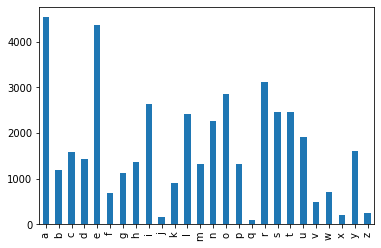

In [7]:
df.sort_index().plot.bar()

In [8]:
sorted(df.sort_values()[-5:].keys())

['a', 'e', 'i', 'o', 'r']

In [9]:
x = [word for word in flcn if sorted(word) == ['a', 'e', 'i', 'o', 'r']]
x

[]

---
The 5 most commonly occuring characters in our corpus are ['a', 'e', 'i', 'o', 'r']. However, we can't make a meaningful 5-letter word from them. So we move over to the next most commonly occuring letter.

---

In [10]:
sorted(df.sort_values()[-6:].keys())

['a', 'e', 'i', 'o', 'r', 't']

---
**Assumption:**  We make a choice here to use 't' in place of the least occuring vowel from the above list, to strike a balance between vowels and consonents.

---

# First Guess

In [11]:
x = [word for word in flcn if sorted(word) == ['a', 'e', 'i', 'r', 't']]
x

['arite', 'irate', 'retia', 'tarie']

---
Here, we can use any of the above four words as our first guess. We choose **'irate'**.


**First Guess: 'irate'**

---

# Second Guess

For the purpose of this demonstration, we assume that our first guess returned.

<img src="./guess1.png" alt="drawing" width="400"/>


Now, we follow the general strategy:
* eliminate greys
* fix greens
* shuffle oranges

In order to narrow down the list of words for our second guess, we use a 5-letter regex pattern with the greens fixed, in this case, something like `'^....e$'`. We also know, **['a', 'i', 't']** are not part of the remaining 4 letters, so the regex can be restricted to `f'^[{x}][{x}][{x}][{x}]e$'`, where `{x}` represents the set of alphabets without **['a', 'i', 't']**. 

We further know that although the letter **'r'** is in the word, it is not in the second position. So, it helps in reducing the list of words further by removing all words that have **'r'** in the second position. The final regex looks something like: `f'^[{x}][{x_orange}][{x}][{x}]e$'`, where `{x_orange}` is the set `{x}` without any letter in the set of oranges.

Finally, we need to make sure that although the oranges are not in designated positions, they occur at least once in the word. Hence, we remove the words where oranges don't appear at all.

In [12]:
##FIXME
greys = ['a', 'i', 't']
greens = ['e']
oranges = {'r': [1]}

In [13]:
df.drop(greys+greens, inplace=True)
#df.sort_index()

In [14]:
x = "".join(df.keys())
#print(x)

In [15]:
# 5-letter word with greens ('e') fixed in their positions
# and greys (['a','i','t']) removed
match_pattern = f'^[{x}][{x}][{x}][{x}]e$'  ##FIXME

flcn = [word for word in flcn if re.match(match_pattern, word)]
#print(len(flcn))
#print(flcn)

for key in oranges.keys():

    # make sure oranges ('r') appear atleast once
    flcn = [word for word in flcn if re.search(key, word)]
    
    # make sure oranges ('r') don't appear in their respective positions
    for pos in range(len(oranges[key])):
        flcn = [word for word in flcn if word[oranges[key][pos]] != key]
        #print(len(flcn))
        #print(flcn)

<AxesSubplot:>

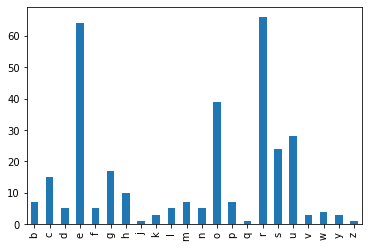

In [16]:
for word in [''.join(flcn)]:
    res = {i : word.count(i) for i in set(word)}
    
df_tmp = pd.Series(res)
df_tmp.sort_index().plot.bar()
#df_tmp.sort_index()

---
`flcn` is the reduced list of words that have `'e'` in the last position and `'r'` NOT in the second position, but at least somewhere else in the word, and does not contain the letters `['a','i','t']` at all.

We now shift our attention to the next most commonly occuring letter.

---

In [17]:
df.sort_values()[-5:].keys()

Index(['n', 'l', 's', 'o', 'r'], dtype='object')

In [18]:
match_pattern = "".join(df.sort_values()[-5:].keys())
match_pattern = f'^[{match_pattern}][{match_pattern}][{match_pattern}][{match_pattern}]e$' ##FIXME

x = [word for word in flcn if re.match(match_pattern, word) != None]
x

['snore']

---
**Second Guess: 'snore'**

---

<img src="./guess2.png" alt="drawing" width="400"/>

# Third Guess

In [19]:
##FIXME

greys = ['s', 'n']
greens = []
oranges = {'r': [1,3],
          'o': [2]}

In [20]:
df.drop(greys+greens, inplace=True)
#df.sort_index()

In [21]:
x = "".join(df.keys())
#print(x)

In [22]:
# 5-letter word with greens ('e') fixed in their positions
# and greys (['a','i','t']) removed
match_pattern = f'^[{x}][{x}][{x}][{x}]e$' ##FIXME

flcn = [word for word in flcn if re.match(match_pattern, word)]
#print(len(flcn))
#print(flcn)

for key in oranges.keys():

    # make sure oranges ('r') appear atleast once
    flcn = [word for word in flcn if re.search(key, word)]
    
    # make sure oranges ('r') don't appear in their respective positions
    for pos in range(len(oranges[key])):
        flcn = [word for word in flcn if word[oranges[key][pos]] != key]
        #print(len(flcn))
        #print(flcn)

<AxesSubplot:>

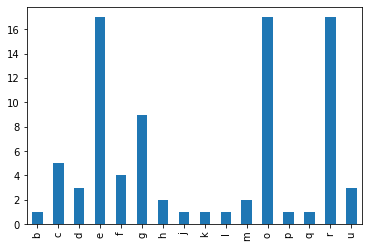

In [23]:
for word in [''.join(flcn)]:
    res = {i : word.count(i) for i in set(word)}
    
df_tmp = pd.Series(res)
df_tmp.sort_index().plot.bar()
#df_tmp.sort_index()

In [24]:
df.sort_values()[-8:].keys()

Index(['h', 'd', 'c', 'y', 'u', 'l', 'o', 'r'], dtype='object')

In [25]:
match_pattern = "".join(df.sort_values()[-8:].keys())
match_pattern = f'^[{match_pattern}][{match_pattern}][{match_pattern}][{match_pattern}]e$' ##FIXME
x = [word for word in flcn if re.match(match_pattern, word) != None]
x

['horde']

---
**Third Guess: 'horde'**

---

<img src="./guess3.png" alt="drawing" width="400"/>

# Fourth Guess

In [26]:
##FIXME

greys = ['h', 'd']
greens = ['o', 'r']
oranges = {}

In [27]:
df.drop(greys+greens, inplace=True)
#df.sort_index()

In [28]:
x = "".join(df.keys())
#print(x)

In [29]:
# 5-letter word with greens ('e') fixed in their positions
# and greys (['a','i','t']) removed
match_pattern = f'^[{x}]or[{x}]e$' ##FIXME

flcn = [word for word in flcn if re.match(match_pattern, word)]
#print(len(flcn))
#print(flcn)

for key in oranges.keys():

    # make sure oranges ('r') appear atleast once
    flcn = [word for word in flcn if re.search(key, word)]
    
    # make sure oranges ('r') don't appear in their respective positions
    for pos in range(len(oranges[key])):
        flcn = [word for word in flcn if word[oranges[key][pos]] != key]
        #print(len(flcn))
        #print(flcn)

<AxesSubplot:>

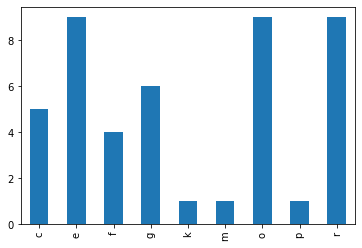

In [30]:
for word in [''.join(flcn)]:
    res = {i : word.count(i) for i in set(word)}
    
df_tmp = pd.Series(res)
df_tmp.sort_index().plot.bar()
#df_tmp.sort_index()

In [31]:
df.sort_values()[-4:].keys()

Index(['c', 'y', 'u', 'l'], dtype='object')

In [32]:
match_pattern = "".join(df.sort_values()[:-4].keys())
match_pattern = f'^[{match_pattern}]or[{match_pattern}]e$' ##FIXME
x = [word for word in flcn if re.match(match_pattern, word) != None]
x

['forge', 'forme', 'gorge', 'porge']

---
**Fourth Guess: 'forme'**

---

# Fifth guess

In [33]:
##FIXME

greys = ['f', 'm']
greens = []
oranges = {}

In [34]:
df.drop(greys+greens, inplace=True)
#df.sort_index()

In [35]:
x = "".join(df.keys())
#print(x)

In [36]:
# 5-letter word with greens ('e') fixed in their positions
# and greys (['a','i','t']) removed
match_pattern = f'^[{x}]or[{x}]e$' ##FIXME

flcn = [word for word in flcn if re.match(match_pattern, word)]
#print(len(flcn))
#print(flcn)

for key in oranges.keys():

    # make sure oranges ('r') appear atleast once
    flcn = [word for word in flcn if re.search(key, word)]
    
    # make sure oranges ('r') don't appear in their respective positions
    for pos in range(len(oranges[key])):
        #print(oranges[key][pos])
        flcn = [word for word in flcn if word[oranges[key][pos]] != key]
        #print(len(flcn))
        #print(flcn)

<AxesSubplot:>

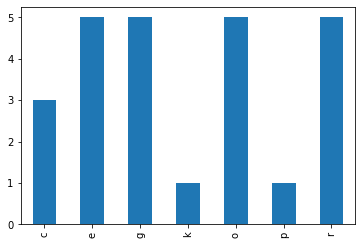

In [37]:
for word in [''.join(flcn)]:
    res = {i : word.count(i) for i in set(word)}
    
df_tmp = pd.Series(res)
df_tmp.sort_index().plot.bar()
#df_tmp.sort_index()

In [38]:
df.sort_values()[-4:].keys()

Index(['c', 'y', 'u', 'l'], dtype='object')

In [39]:
match_pattern = "".join(df.sort_values()[:-4].keys())
match_pattern = f'^[{match_pattern}]or[{match_pattern}]e$' ##FIXME
x = [word for word in flcn if re.match(match_pattern, word) != None]
x

['gorge', 'porge']

---
**Fifth Guess: 'porge'**

---

<img src="./guess5.png" alt="drawing" width="400"/>

# Last Guess

In [40]:
##FIXME

greys = ['p']
greens = []
oranges = {}

In [41]:
df.drop(greys+greens, inplace=True)
#df.sort_index()

In [42]:
x = "".join(df.keys())
#print(x)

In [43]:
# 5-letter word with greens ('e') fixed in their positions
# and greys (['a','i','t']) removed
match_pattern = f'^[{x}]orge$' ##FIXME

flcn = [word for word in flcn if re.match(match_pattern, word)]
#print(len(flcn))
#print(flcn)

for key in oranges.keys():

    # make sure oranges ('r') appear atleast once
    flcn = [word for word in flcn if re.search(key, word)]
    
    # make sure oranges ('r') don't appear in their respective positions
    for pos in range(len(oranges[key])):
        flcn = [word for word in flcn if word[oranges[key][pos]] != key]
        #print(len(flcn))
        #print(flcn)

<AxesSubplot:>

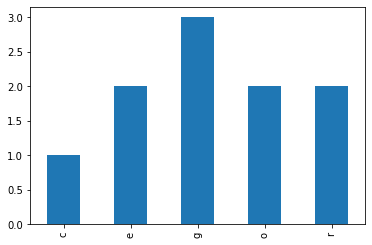

In [44]:
for word in [''.join(flcn)]:
    res = {i : word.count(i) for i in set(word)}
    
df_tmp = pd.Series(res)
df_tmp.sort_index().plot.bar()
#df_tmp.sort_index()

In [45]:
df.sort_values()[-4:].keys()

Index(['c', 'y', 'u', 'l'], dtype='object')

In [46]:
match_pattern = "".join(df.sort_values()[:-4].keys())
match_pattern = f'^[{match_pattern}]orge$' ##FIXME
x = [word for word in flcn if re.match(match_pattern, word) != None]
x

['gorge']

---
**Fifth Guess: 'gorge'**

---

<img src="./guess6.png" alt="drawing" width="400"/>